In [26]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [28]:
pd.options.display.max_rows
pd.options.display.max_rows = 70
pd.options.display.max_rows

70

In [8]:
ch89dg = pd.read_csv('./cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('./cleaned_data/ch89m.csv')
ch89pru = pd.read_csv('./cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('./cleaned_data/ch89q.csv')

In [9]:
df = ch89dg.set_index(ch89dg.columns[0]).copy()

In [10]:
df.columns

Index(['county', 'sex', 'xiang', 'd001', 'd002', 'd003', 'd004', 'd005',
       'd006', 'd007',
       ...
       'd157', 'd158', 'd159', 'd160', 'd161', 'g001', 'g002', 'g003', 'g004',
       'g005'],
      dtype='object', length=169)

In [33]:
df['county'].fillna('NA', inplace=True)

In [20]:
# diet survey CALORIC INTAKE (kcal/day/reference man)
df[df['xiang']==3].d001.describe()

count      69.000000
mean     2406.492754
std       324.448429
min      1579.000000
25%      2198.000000
50%      2433.000000
75%      2605.000000
max      3066.000000
Name: d001, dtype: float64

In [23]:
# diet survey TOTAL PROTEIN INTAKE (g/day/reference man)
df[df['xiang']==3].d003.describe()

count    69.000000
mean     59.081159
std       8.879144
min      40.700000
25%      52.400000
50%      58.100000
75%      65.400000
max      82.800000
Name: d003, dtype: float64

In [27]:
df[df['xiang']==3].loc[:,'d005':'d009'].describe()
# percentage caloric intake from
#     fat -- protein -- animal protein -- plant protein -- carbohydrate

,d005,d006,d007,d008,d009
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,18.278261,9.947826,1.265217,8.691304,71.253623
std,5.832487,1.439425,1.349273,1.613248,6.183364
min,7.400000,6.600000,0.000000,5.700000,55.900000
25%,13.700000,9.000000,0.300000,7.300000,66.600000
50%,18.400000,10.000000,0.900000,8.500000,72.600000
75%,22.000000,11.000000,1.700000,9.900000,76.200000
max,32.600000,13.700000,5.800000,13.000000,82.200000


In [28]:
df[df['xiang']==3].loc[:,'d012':'d016'].describe()
# mg/day/person intake of vitamins
#        vit A  --   vit E --  vit C --  vit B1 -- vit B2

,d012,d013,d014,d015,d016
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,682.347826,25.613043,120.240580,1.918841,0.726087
std,410.514413,10.542113,54.320804,0.668025,0.155915
min,77.000000,5.100000,28.900000,0.900000,0.400000
25%,420.000000,17.500000,82.900000,1.400000,0.600000
50%,594.000000,25.400000,111.400000,2.000000,0.700000
75%,848.000000,34.600000,157.700000,2.400000,0.800000
max,2009.000000,53.600000,344.900000,3.700000,1.200000


In [30]:
df[df['xiang']==3].loc[:,'d028':'d036'].describe()
# intake from 
#      pl food -- anl food -- tot food -- % pl fd - % anl fd - pl pt -- anl pt -- % pl pt -- % anl pt

,d028,d029,d030,d031,d032,d033,d034,d035,d036
count,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1082.579710,77.308696,1159.84058,92.975362,7.042029,51.539130,7.556522,87.788406,12.253623
std,214.691188,74.382467,190.46133,6.880950,6.886803,11.410357,7.487627,11.979425,11.979229
min,669.000000,0.000000,825.00000,73.000000,0.000000,28.800000,0.000000,52.500000,0.000000
25%,916.000000,25.600000,1006.00000,88.600000,2.000000,41.800000,1.600000,81.000000,3.200000
50%,1055.000000,54.000000,1151.00000,95.400000,4.700000,52.100000,5.400000,91.400000,8.600000
75%,1217.000000,117.000000,1271.00000,98.000000,11.400000,58.500000,9.900000,96.800000,19.100000
max,1656.000000,367.600000,1684.00000,100.000000,27.100000,79.300000,29.400000,100.000000,47.500000


In [32]:
df[df['xiang']==3].loc[:,'d037':'d040'].describe()
# different carbs (g/day/person)
#        rice   --  wheat  --  cereal  -- starch

,d037,d038,d039,d040
count,69.000000,69.000000,69.000000,69.000000
mean,299.120290,168.391304,51.584058,147.772464
std,215.197818,214.614754,99.089291,172.160451
min,0.000000,0.000000,0.000000,0.000000
25%,21.400000,8.700000,0.000000,34.600000
50%,382.800000,37.600000,0.800000,90.300000
75%,477.200000,335.800000,61.000000,185.400000
max,599.500000,676.300000,492.300000,788.500000


In [35]:
df[df['xiang']==3].loc[:,'d041':'d046'].describe()
# plant food items (g/day/person)
#   legume -- light col veg -- grn veg - dry/pickl veg - fruit - nut

,d041,d042,d043,d044,d045,d046
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,21.389855,160.020290,148.798551,21.494203,14.273913,2.279710
std,22.722392,118.277982,95.226943,27.175275,33.632668,6.899138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,65.700000,71.000000,2.900000,0.000000,0.000000
50%,15.300000,136.900000,135.100000,14.300000,0.700000,0.100000
75%,32.400000,215.500000,221.200000,26.100000,9.900000,1.400000
max,104.600000,510.600000,434.900000,151.500000,197.800000,52.400000


In [37]:
df[df['xiang']==3].loc[:,'d047':'d052'].describe()
# animal product intake (g/day/person)
#        milk --   eggs   -- all meat -- red meat - poultry -- fish

,d047,d048,d049,d050,d051,d052
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,7.966667,4.204348,32.881159,29.334783,3.546377,25.665217
std,39.912178,4.649049,25.174475,23.687610,4.376998,40.981771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,14.000000,12.800000,0.000000,0.000000
50%,0.000000,2.600000,32.900000,25.800000,2.300000,6.100000
75%,0.000000,7.700000,47.600000,43.000000,5.900000,29.900000
max,292.200000,18.000000,104.400000,104.400000,17.500000,184.700000


In [39]:
# geography
df[df['xiang']==3].loc[:,'g001':'g005'].describe()
#       lat   --   long   --    elev  --   arid  --   heat

,g001,g002,g003,g004,g005
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,31.689855,112.639130,413.768116,1.623188,4.014493
std,6.299256,8.573973,527.803025,0.971679,1.265989
min,21.500000,82.800000,0.000000,1.000000,2.000000
25%,26.500000,108.600000,50.000000,1.000000,3.000000
50%,31.200000,113.300000,100.000000,1.000000,4.000000
75%,36.000000,118.800000,750.000000,3.000000,5.000000
max,46.300000,132.200000,2500.000000,4.000000,7.000000


array([[<AxesSubplot:title={'center':'d047'}>,
        <AxesSubplot:title={'center':'d048'}>],
       [<AxesSubplot:title={'center':'d049'}>,
        <AxesSubplot:title={'center':'d050'}>],
       [<AxesSubplot:title={'center':'d051'}>,
        <AxesSubplot:title={'center':'d052'}>]], dtype=object)

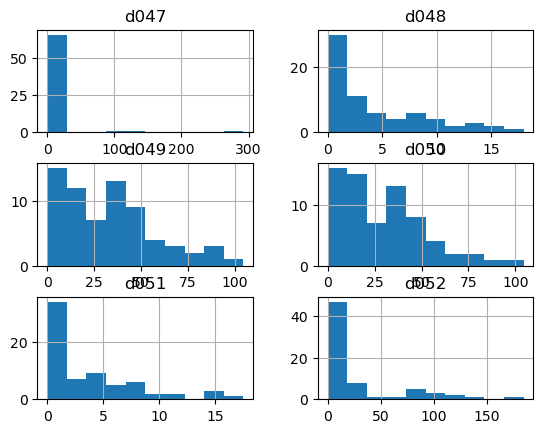

In [36]:
df[df['xiang']==3].loc[:,'d047':'d052'].hist()